In [1]:
import numpy as np
import matplotlib.pyplot as plt
from useful_functions import *
from scipy.io import loadmat

In [2]:
data = loadmat('indy_20160407_02_py.mat')

In [3]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'chan_names', 'cursor_pos', 'finger_pos', 'spikes', 't', 'target_pos', 'wf'])

A. Get the instantaneous firing rate:
 from spike-times obtain an instantaneous firing rate 
(continuous time series)

In [7]:
#kick the unsorted spikes u1
sorted_spikes = data['spikes'][:,1:]
sorted_spikes.shape
    
#time bins
time_bins = data['t'].flatten()


array([ 60.06372324,  60.17832785,  60.29207227, ..., 887.61186779,
       887.6568413 , 887.73810492])

build a matrix collecting the instantaneous firing rate of all recorded neurons 
spM(NxT)

(174, 204445)


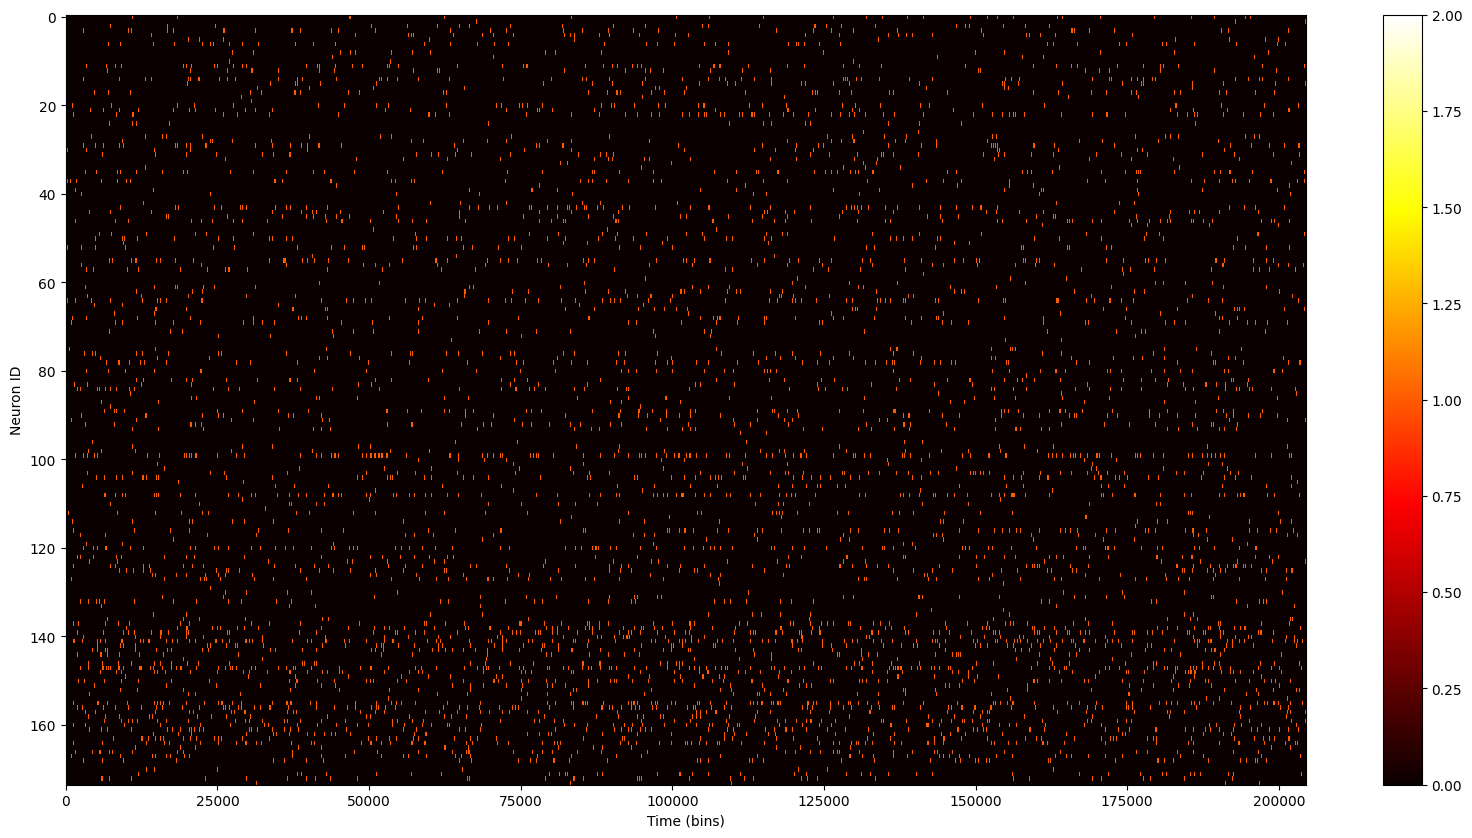

In [12]:
spM = []
n_channels, n_units = sorted_spikes.shape
for channel in range(n_channels):
    for unit in range(n_units):
        spike_times = sorted_spikes[channel, unit].flatten()
        if len(spike_times) > 0:
            spM.append(np.histogram(spike_times, bins=time_bins)[0])

spM = np.array(spM)
print(spM.shape)
plt.figure(figsize=(20, 10))
plt.imshow(spM, aspect='auto', cmap='hot', interpolation='nearest')
plt.xlabel('Time (bins)')
plt.ylabel('Neuron ID')
plt.colorbar()

 B. build an event matrix evM (PxT) of [0 1] marking the presence/absence of a certain stimulus

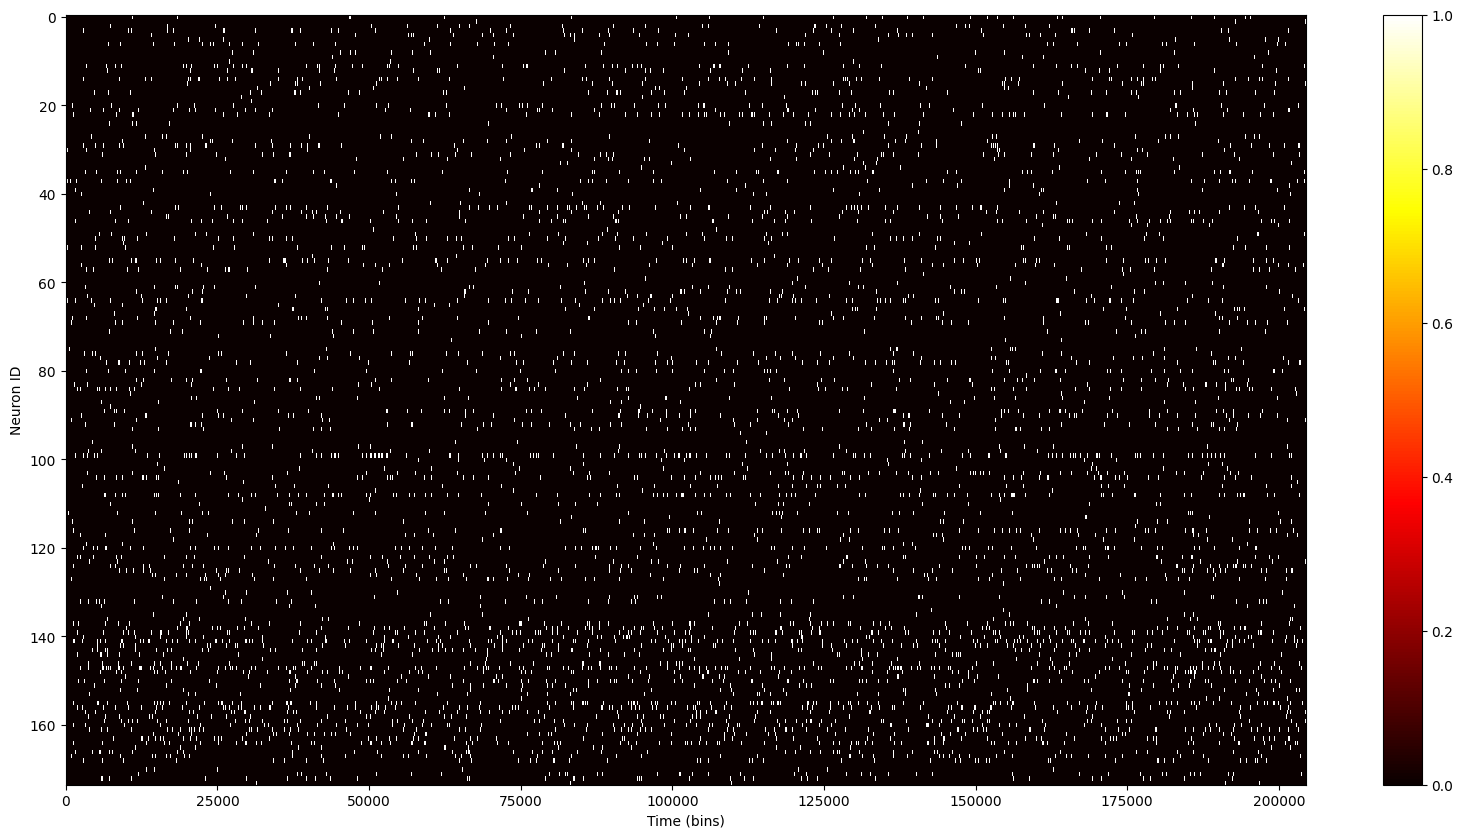

In [13]:
evM = spM > 0
plt.figure(figsize=(20, 10))
plt.imshow(evM, aspect='auto', cmap='hot', interpolation='nearest')
plt.xlabel('Time (bins)')
plt.ylabel('Neuron ID')
plt.colorbar()

 C. build a hand position matrix handM (3xT) with the coordinates of the hand


In [7]:
handM = data['finger_pos'].T
print(handM.shape)

(3, 204446)


In [15]:
np.savetxt('manifold.csv', handM.T, delimiter=',')
np.savetxt('groups.csv', np.arange(handM.shape[1]), delimiter=',')

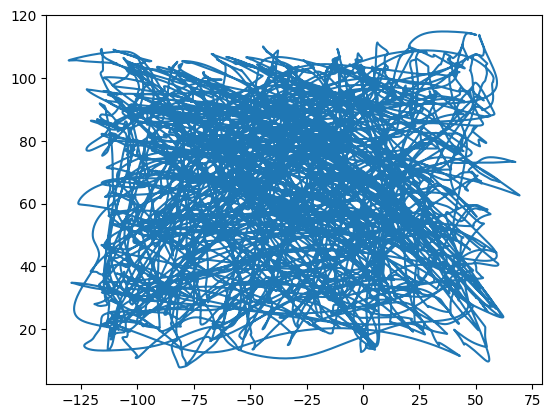

In [16]:
x,y = data['cursor_pos'][:,0], data['cursor_pos'][:,1]
plt.plot(x,y)

In [17]:
len(np.unique(data['target_pos'][:,0])), len(np.unique(data['target_pos'][:,1]))

(17, 8)

In [18]:
target_x = np.unique(data['target_pos'][:,0])
target_y = np.unique(data['target_pos'][:,1])
dic={}
for i in range(len(target_x)):
    for j in range(len(target_y)):
        dic[(target_x[i], target_y[j])] = len(dic)

labels = np.zeros(data['target_pos'].shape[0])
for i in range(data['target_pos'].shape[0]):
    labels[i] = dic[(data['target_pos'][i,0], data['target_pos'][i,1])]
    

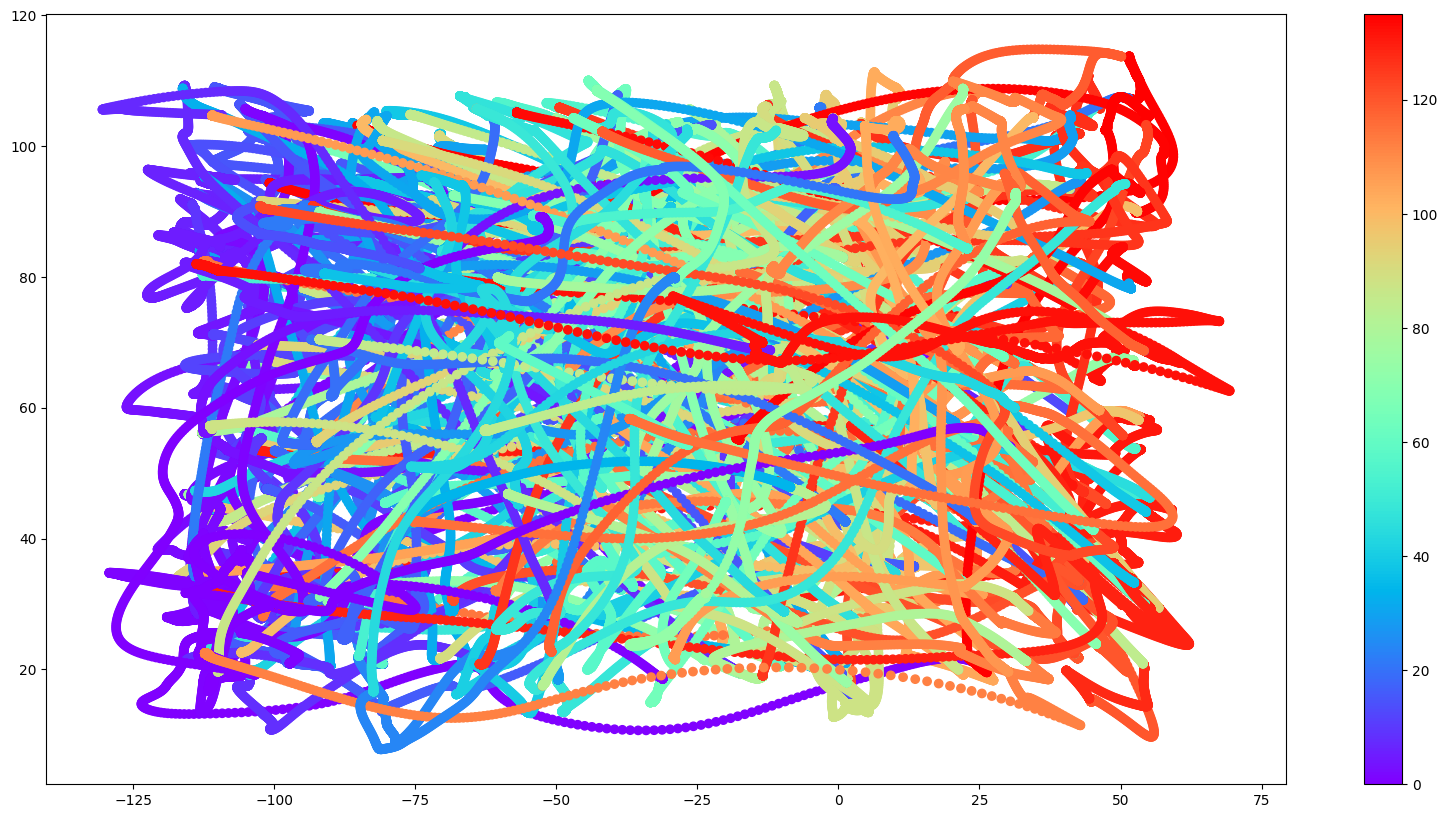

In [19]:
plt.figure(figsize=(20,10))
plt.scatter(x,y, c=labels, cmap='rainbow')
plt.colorbar()

[0.0235361  0.02272889 0.02126238]


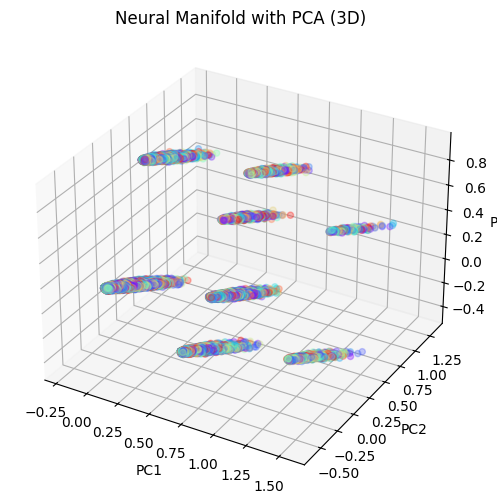

In [20]:
#neural manifold with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X = pca.fit_transform(evM.T)

print(pca.explained_variance_ratio_)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker='o', alpha=0.3, c=labels[1:], cmap='rainbow')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Neural Manifold with PCA (3D)')
plt.ion()
plt.show()

In [21]:
np.savetxt('manifold.csv', X, delimiter=',')
np.savetxt('groups.csv', labels[1:], delimiter=',')

In [22]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8 , n_init="auto").fit(X)
print(kmeans.labels_)
print(kmeans.cluster_centers_)



[1 7 3 ... 0 7 0]
[[-0.16905994 -0.08843428 -0.04951088]
 [ 0.74127464 -0.52291111 -0.06107146]
 [ 0.27362748  0.75898623 -0.39614041]
 [ 0.02135233  0.24028263  0.88675467]
 [ 0.9487704  -0.1364918   0.83938541]
 [ 1.15774012  0.29390359 -0.40515072]
 [ 0.44231578  1.05404407  0.54244274]
 [-0.07460101  0.02017604 -0.05723043]]


In [23]:
np.savetxt('manifold.csv', X, delimiter=',')
np.savetxt('groups.csv', kmeans.labels_, delimiter=',')

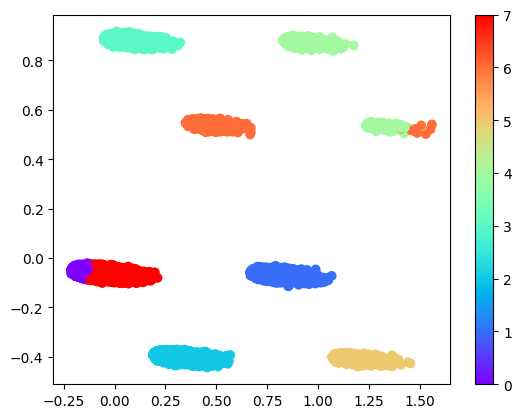

In [24]:
plt.scatter(X[:, 0], X[:, 2], c=kmeans.labels_, cmap='rainbow')
plt.colorbar()

(-1.0, 8.0)

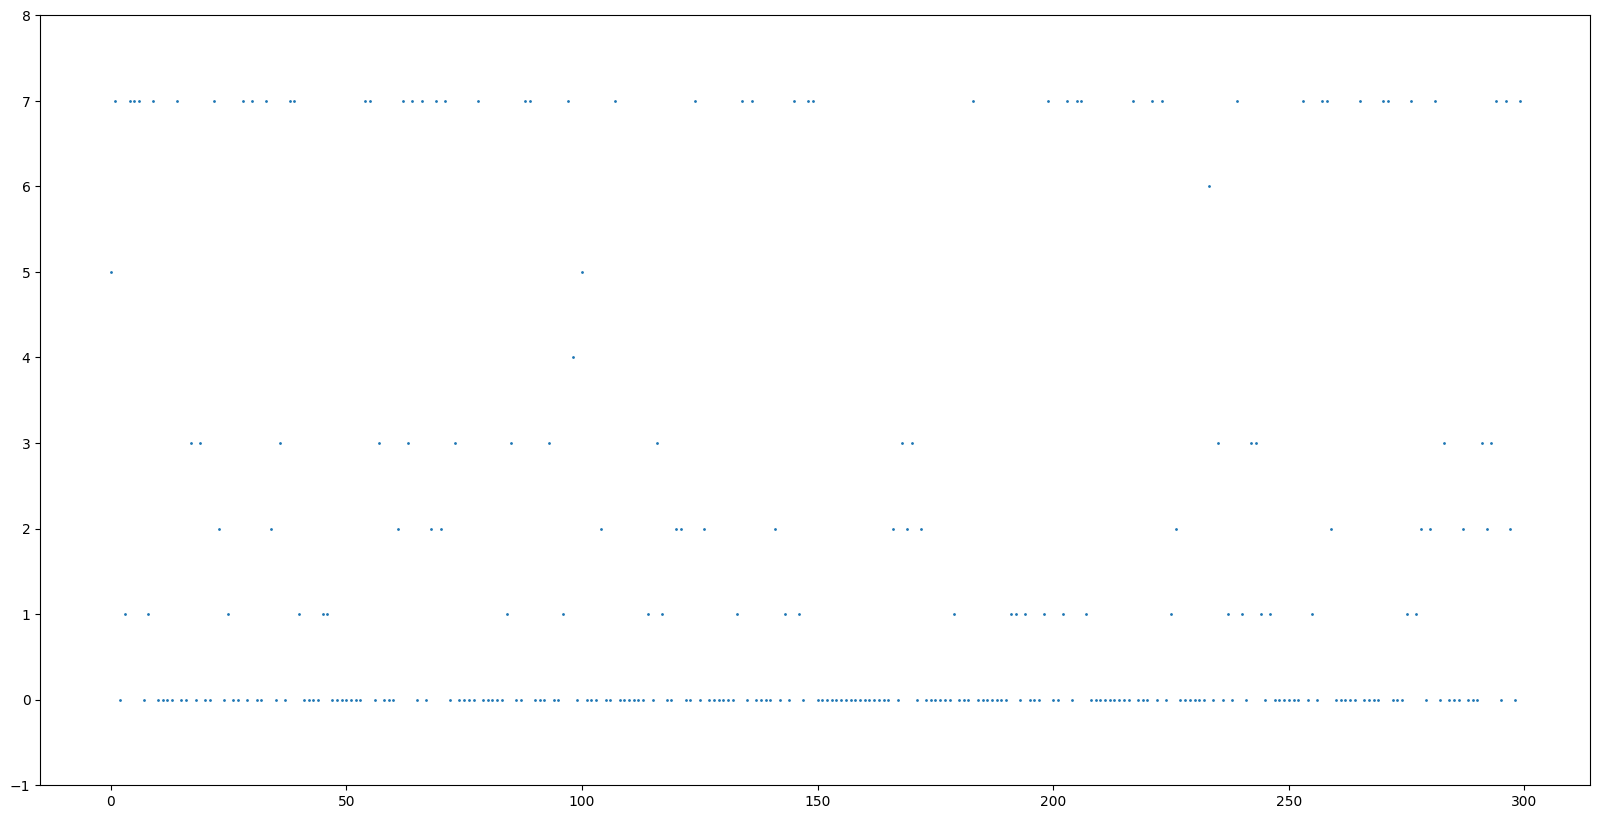

In [51]:
plt.figure(figsize=(20,10))
x = kmeans.labels_[:25000]
n = 1
plt.plot(np.convolve(x, np.ones(n)/n, mode='same')[2000:2300], 'o', markersize=1)
plt.ylim(np.min(x)-1, np.max(x)+1)

In [27]:
input_size = 174

# Generate random data for demonstration
input_data = spM.T/np.max(spM)

# Create an autoencoder model
autoencoder, encoder = create_autoencoder(data=input_data, input_size=input_size, latent_dim=3, dimensions=[64, 32])

# predict the autoencoder output from test data
decoded_data = autoencoder.predict(input_data)
print(decoded_data.shape)

# Viusalize the latent space
X = encoder.predict(input_data)
print(X.shape)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 174)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,379 (52.26 KB)

 Trainable params: 13,379 (52.26 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 174)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 174)            │        11,310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,929 (105.19 KB)

 Trainable params: 26,929 (105.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
639/639 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.1969 - val_loss: 0.0568
Epoch 2/50
639/639 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0562 - val_loss: 0.0550
Epoch 3/50
639/639 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0540 - val_loss: 0.0534
Epoch 4/50
639/639 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0529 - val_loss: 0.0523
Epoch 5/50
639/639 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0517 - val_loss: 0.0510
Epoch 6/50
639/639 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0506 - val_loss: 0.0503
Epoch 7/50
639/639 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0499 - val_loss: 0.0498
Epoch 8/50
639/639 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0495 - val_loss: 0.0495
Epoch 9/50
639/639 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0493 - val_loss: 0.0492
Epoch 10/50
639/639 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0488 - val_loss: 0.0490
Epoch 11/50
639/639 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0485 - val_loss: 0.0487
Epoch 12/50
639/639 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step

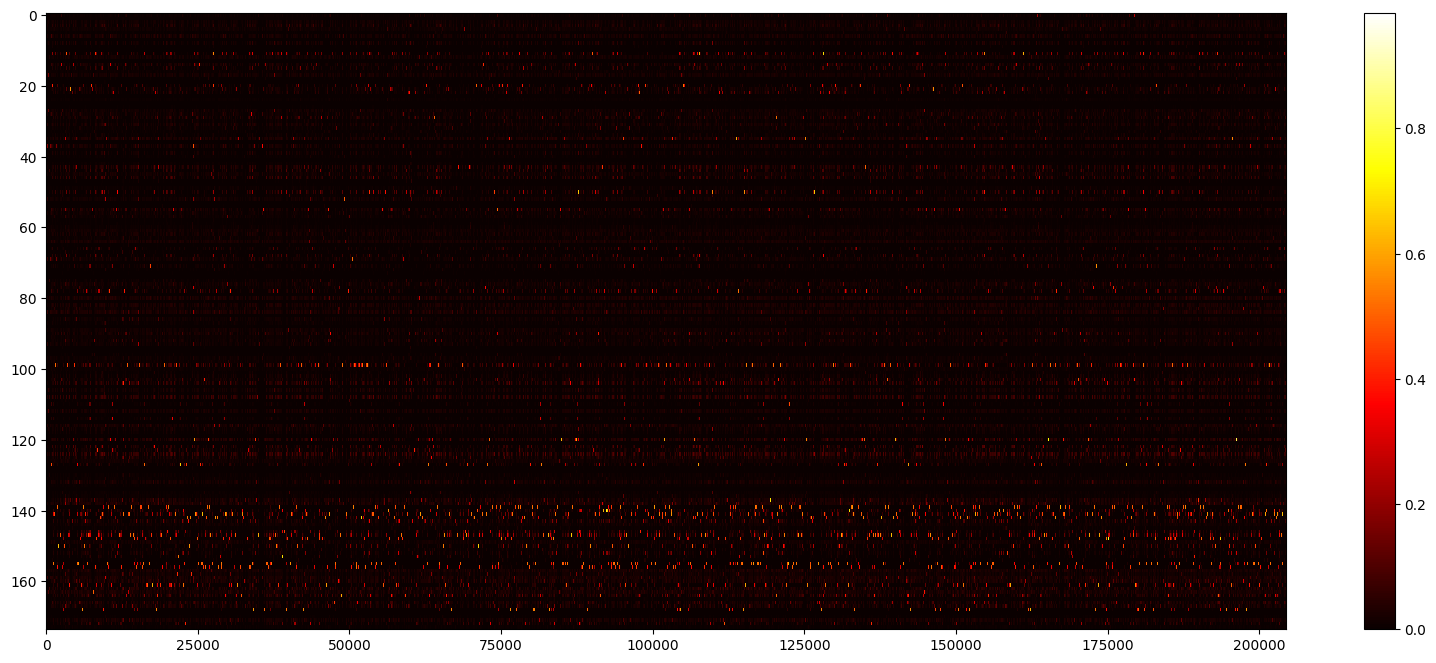

In [28]:
plt.figure(figsize=(20, 8))
plt.imshow(decoded_data.T, aspect='auto', cmap='hot', interpolation='nearest')
plt.colorbar()

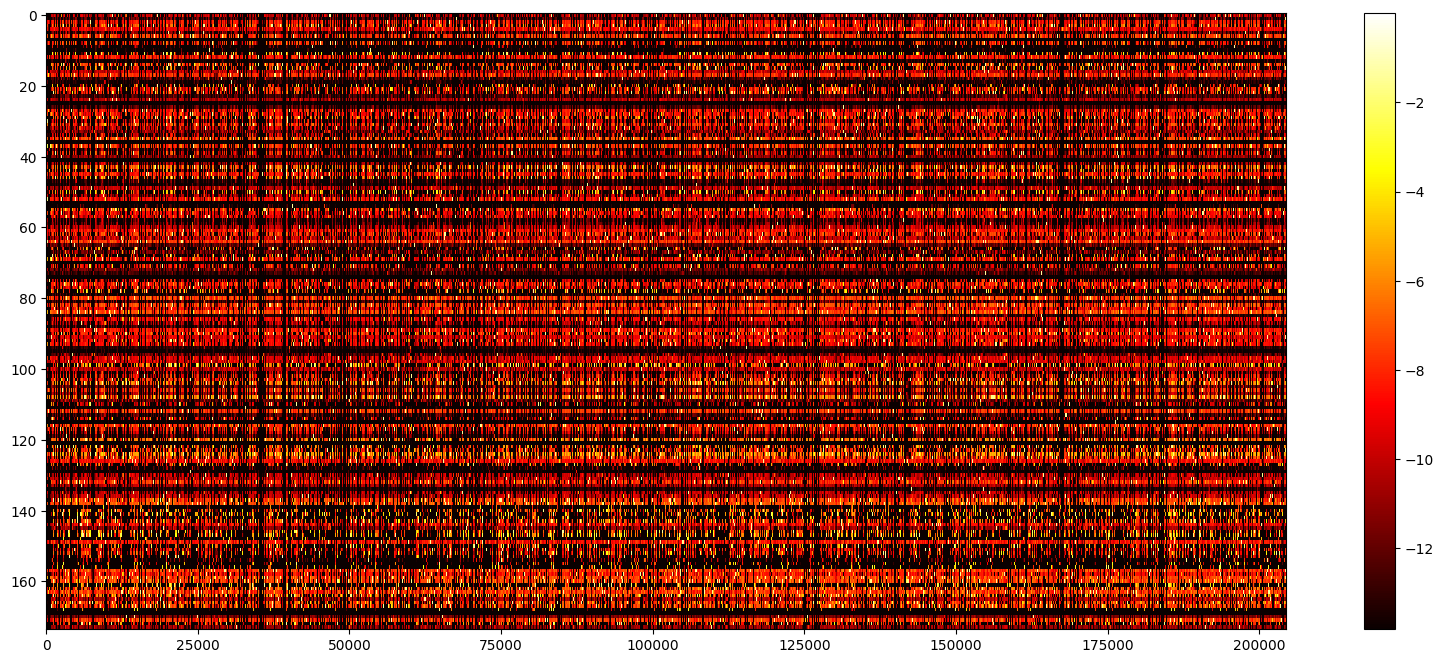

In [29]:
plt.figure(figsize=(20, 8))
plt.imshow(np.log((decoded_data.T- input_data.T)**2+ 1e-6), aspect='auto', cmap='hot', interpolation='nearest')
plt.colorbar()

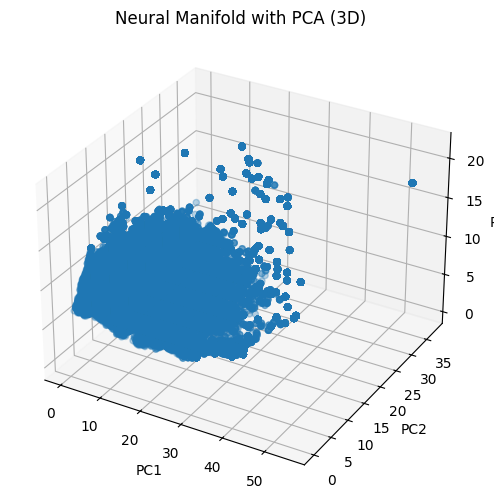

In [30]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker='o', alpha=0.3)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Neural Manifold with PCA (3D)')
plt.ion()
plt.show()

In [31]:
# Define the new bin size in milliseconds
new_bin_size_ms = 400*10**-3  # 400 ms

# Calculate the ratio between the new and old bin sizes
resample_factor = int(new_bin_size_ms / np.mean(np.diff(time_bins)))  # 400 ms / 10 ms = 40

# Resample the matrix by summing the spikes within each new bin
# Use np.add.reduceat to sum spikes within each group of 'resample_factor' bins
# Then reshape the result to match the new number of bins
r_spM = np.add.reduceat(spM, np.arange(0, spM.shape[1], resample_factor), axis=1)
r_labels = np.add.reduceat(labels[1:], np.arange(0, labels.shape[0], resample_factor))/resample_factor

# Verify the shape of the resampled matrix
print("Original shape:", spM.shape)
print("Resampled shape:", r_spM.shape)
print("Resampled labels shape:", r_labels.shape)

Original shape: (174, 204445)
Resampled shape: (174, 2045)
Resampled labels shape: (2045,)


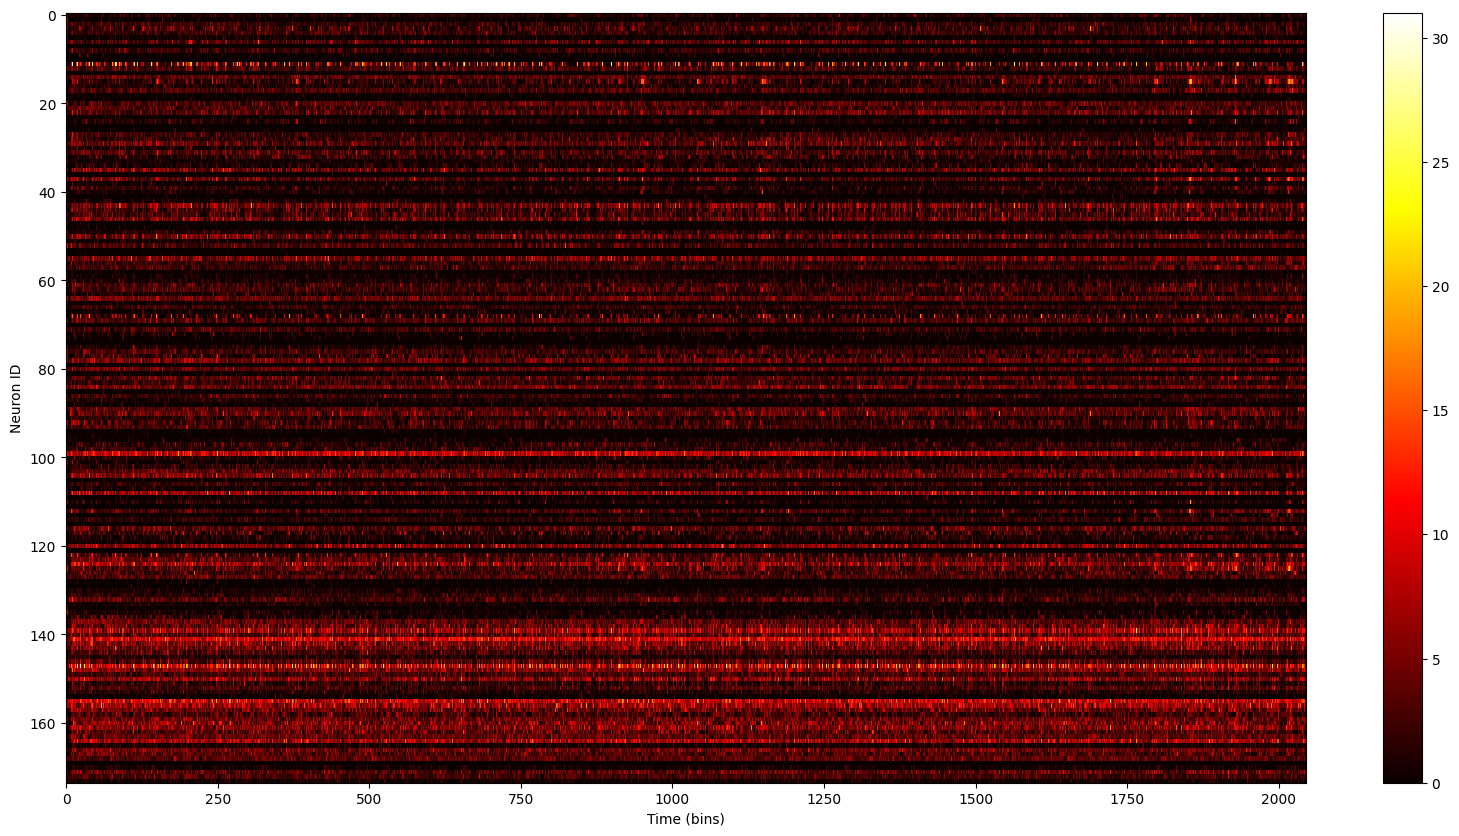

In [32]:
plt.figure(figsize=(20, 10))
plt.imshow(r_spM, aspect='auto', cmap='hot', interpolation='nearest')
plt.xlabel('Time (bins)')
plt.ylabel('Neuron ID')
plt.colorbar()

In [33]:
from sklearn.manifold import Isomap
isomap = Isomap(n_components=3, n_jobs=-1, n_neighbors=5)
X = isomap.fit_transform(r_spM.T)
print(X.shape)

(2045, 3)


In [34]:
np.savetxt('manifold.csv', X, delimiter=',')

[0.21580679 0.07610085 0.03413899]


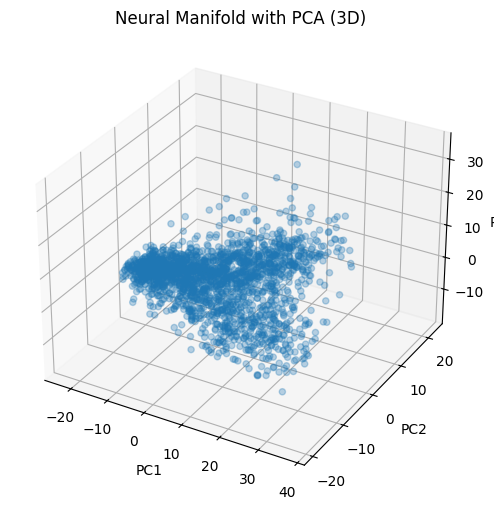

In [35]:
#neural manifold with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X = pca.fit_transform(r_spM.T)

print(pca.explained_variance_ratio_)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker='o', alpha=0.3,)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Neural Manifold with PCA (3D)')
plt.ion()
plt.show()

In [36]:
np.savetxt('manifold.csv', X, delimiter=',')
np.savetxt('groups.csv', r_labels, delimiter=',')

# lets try to fit r_spM before transforming it and use a gaussian filter

In [37]:
from scipy.ndimage import gaussian_filter1d

[0.21580679 0.07610085 0.03413899]


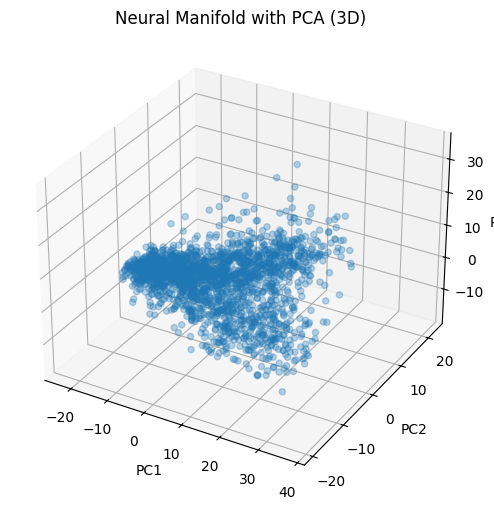

In [38]:
rf_spM = (r_spM - np.mean(r_spM, axis=0))/np.std(r_spM, axis=0)

smoothed_spM = gaussian_filter1d(rf_spM, sigma=.005, axis=0)


pca = PCA(n_components=3)
X = pca.fit_transform(r_spM.T)
print(pca.explained_variance_ratio_)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker='o', alpha=0.3,)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Neural Manifold with PCA (3D)')
plt.ion()
plt.show()


In [39]:
np.savetxt('manifold.csv', X, delimiter=',')
np.savetxt('groups.csv', r_labels, delimiter=',')

Not very good results

In [40]:
target_x = data['target_pos'][:,0]
target_y = data['target_pos'][:,1]

In [41]:
target_x.shape, target_y.shape

((204446,), (204446,))

In [42]:
r_labels = np.add.reduceat(target_y, np.arange(0, target_x.size, resample_factor),)/resample_factor
np.savetxt('groups.csv', r_labels, delimiter=',')

### Let's try to make 4 classes by grouping the target position in boxes left, right and up, down

In [66]:
target_x = data['target_pos'][:,0].flatten()
target_y = data['target_pos'][:,1].flatten()

r_target_x = np.add.reduceat(target_x, np.arange(0, target_x.size, resample_factor),)/resample_factor
r_target_y = np.add.reduceat(target_y, np.arange(0, target_y.size, resample_factor),)/resample_factor

mx = np.mean(r_target_x)
my = np.mean(r_target_y)
r_target_x = r_target_x - mx
r_target_y = r_target_y - my

r4_labels = np.zeros_like(r_labels)
for i in range(r_labels.size):
    #r4_labels[i] = 0 if r_target_x[i] > 0 and r_target_y[i] > 0 else 1 if r_target_x[i] > 0 and r_target_y[i] < 0 else 2 if r_target_x[i] < 0 and r_target_y[i] < 0 else 3
    #only up and down
    #r4_labels[i] = 0 if r_target_y[i] > 0 else 1
    #only left and right
    r4_labels[i] = 0 if r_target_x[i] > 0 else 1
np.savetxt('groups.csv', r4_labels, delimiter=',')
position = ['upper right', 'lower right', 'lower left', 'upper left']

In [65]:
for i,pos in enumerate(position):
    print(pos, ':', i)

upper right : 0
lower right : 1
lower left : 2
upper left : 3
